In [101]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [105]:
X,Y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=5,
    random_state=10,
)

In [106]:
X.shape, Y.shape

((500, 2), (500,))

[]

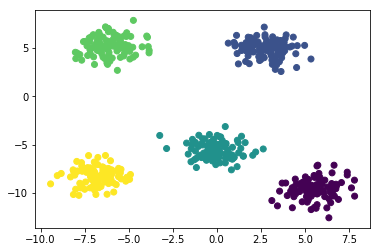

In [107]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot()

[]

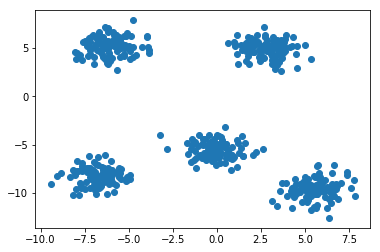

In [108]:
plt.scatter(X[:,0], X[:,1])
plt.plot()

In [109]:
k = 5 
color = ["red", "blue", "green","orange", "yellow"]
clusters = {}   #features - centres, colors, points assigned


for i in range(k):
    center = 20*(np.random.random((2,))-0.5)
    
    clusters[i] = {
        'center':center,
        'points':[],
        'color':color[i]
        
     }

In [110]:
clusters

{0: {'center': array([-0.59786193,  4.711521  ]),
  'points': [],
  'color': 'red'},
 1: {'center': array([6.6651952 , 0.42665658]), 'points': [], 'color': 'blue'},
 2: {'center': array([0.85602918, 3.36132684]),
  'points': [],
  'color': 'green'},
 3: {'center': array([1.74445383, 1.70540232]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([9.00119108, 0.10582798]),
  'points': [],
  'color': 'yellow'}}

In [111]:
def distance(a,b):
    return  np.sqrt(np.sum((a-b)**2))

In [112]:
def assignPtsToClusters(clusters, X):
    m = X.shape[0]
    for i in range(m):
        dist = []
        for kx in range(k):
            d = distance(X[i], clusters[kx]['center'])
            dist.append(d)
        cluster_i = np.argmin(dist)
        clusters[cluster_i]['points'].append(X[i])
        
        
        
def updateClusterCenters(clusters):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if  pts.shape[0]>0:
            new_points = np.mean(pts, axis =0)
            clusters[kx]['center'] = new_points
            clusters[kx]['points'] = []

In [113]:
def plotClusters(clusters):
    plt.scatter(X[:,0],X[:,1], c = Y)
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            plt.scatter(pts[:,0], pts[:, 1], color = clusters[i]['color'])
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1], marker ='*')
    
    plt.show()

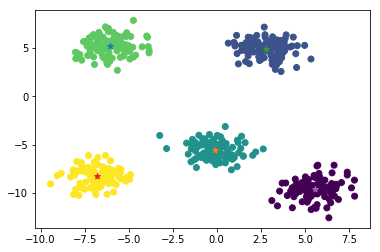

In [123]:
plotClusters(clusters)
assignPtsToClusters(clusters, X)
updateClusterCenters(clusters)